In [1]:
import numpy as np
import matplotlib.pyplot as plt

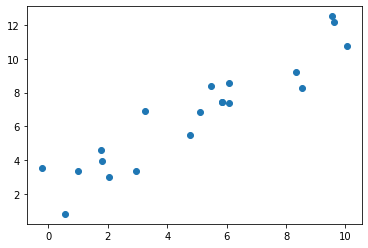

In [4]:
# 선형 데이터 생성
x = np.linspace(0, 10, 20) + np.random.randn(20)
y = np.linspace(2, 12, 20) + np.random.randn(20)
plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# 계수, 즉 가중치
w = linear.coef_[0]
w

0.9286028013071685

In [10]:
# 절편, 바이어스, bias
b = linear.intercept_
b

2.130108313041875

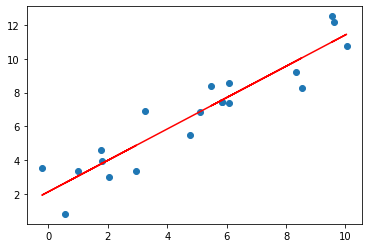

In [11]:
plt.scatter(x, y)
plt.plot(x, w * x + b, c='r')

In [13]:
x_test = np.linspace(2, 8, 50)
y_ = linear.predict(x_test.reshape(-1, 1))

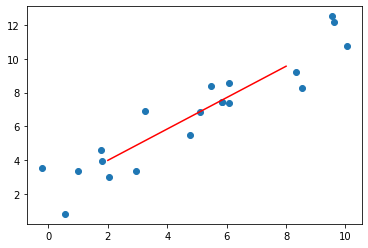

In [14]:
plt.scatter(x, y)
plt.plot(x_test, y_, c='r')

In [ ]:
from sklearn.datasets import california_housing

#### 정규 방정식을 사용하여 계수 계산

$$\theta = (X^TX)^{-1}X^Ty$$

In [20]:
ones = np.ones(shape=(20, 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
np.hstack, np.vstack
# h 수평: horizontal
# v 수직: vertical

In [ ]:
np.concatenate()

In [24]:
# 선형 방정식을 행렬 형태로 작성하고, x의 앞에 모두 1로 이루어진 열을 추가해야 합니다.
X = np.hstack((ones, x.reshape(-1, 1)))

In [22]:
y

array([ 0.81543847,  3.33739612,  3.9443144 ,  3.55972885,  2.97508158,
        3.37477355,  4.59683121,  6.91160624,  5.48458241,  6.85589041,
        8.55829864,  7.3787894 ,  8.29515609,  7.42980348,  7.41569333,
        8.36308431,  9.23240271, 10.77915772, 12.51787793, 12.18364203])

In [29]:
np.dot(X.T, X)

array([[ 20.        ,  98.43539402],
       [ 98.43539402, 678.77809362]])

In [26]:
X.shape

(20, 2)

In [28]:
# 전치
X.T

(2, 20)

In [31]:
# 행렬의 역을 구하기 위해서는 정사각 행렬이어야 합니다. 정사각 행렬은 풀랭크 행렬이어야 합니다. 역을 구할 수 없는 행렬은 특이 행렬이라고 합니다.Singular matrix
# linear algebra 선형 대수
np.linalg.inv(np.dot(X.T, X))@X.T@y

array([2.13010831, 0.9286028 ])

In [32]:
w, b

(0.9286028013071685, 2.130108313041875)

In [34]:
from sklearn.datasets import load_diabetes

In [35]:
diabetes = load_diabetes()

In [39]:
type(diabetes)

sklearn.utils.Bunch

In [ ]:
# 문제가 분류인지 회귀인지 확인하기 위해 주로 타깃에 관심을 둡니다.target
# target타깃이 연속적인 값을 가진다면 회귀 문제입니다.
# target타깃이 이산적인 값을 가진다면 분류 문제입니다

In [38]:
print(diabetes.__str__())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [40]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [41]:
data = diabetes['data']
target = diabetes['target']

In [42]:
data.shape

(442, 10)

In [43]:
target.shape

(442,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [46]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
linear.coef_

array([ -13.77882579, -237.16843281,  479.93587014,  364.93703082,
       -907.16438951,  616.55778759,   91.39340519,  102.62380244,
        807.42542149,   72.99143496])

In [48]:
linear.intercept_

152.612685696151

In [49]:
linear.score(X_test, y_test)

0.4711089629253808

In [50]:
from sklearn.datasets import load_boston

In [52]:
boston = load_boston()


In [53]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu